# **F127167 23COC102**
## Tutorial: A Neural Network for Music Genre Classification
---


# Abstract

This tutorial was created with the aim to demonstrate how to use Pytorch to create a neural network. This neural network acts a music genre classifier, trained on the FMA dataset's Echonest music features. Upon creation of this model, different configurations of hyper-parameters were explored to understand what changes can improve performance the most. Once the best changes were identified, a new model was created with a mix of these changes. The initial and new model were compared and a change in performance was observed. In addition, readers were provided with suggestions for further explorations they could carry out independently.

# Table of contents 
- [Introduction](#toc4_)    
  - [Assumptions](#toc4_1_)    
  - [Overview](#toc4_2_)    
    - [Definitions](#toc4_2_1_)    
    - [This Tutorial](#toc4_2_2_)    
  - [Learning Objectives](#toc4_3_)    
  - [Comparison to different tutorials](#toc4_4_)    
    - [Pros](#toc4_4_1_)    
    - [Cons](#toc4_4_2_)    
    - [Table](#toc4_4_3_)    
- [Tutorial](#toc5_)    
  - [Setup](#toc5_1_)    
    - [Requirements](#toc5_1_1_)    
    - [Import the required libraries](#toc5_1_2_)    
  - [Loading the data](#toc5_2_)    
  - [Preprocessing the data](#toc5_3_)    
    - [Data Cleaning](#toc5_3_1_)    
    - [Feature Selection](#toc5_3_2_)    
    - [Data cleaning](#toc5_3_3_)    
    - [Data transformation](#toc5_3_4_)    
    - [Splitting the data](#toc5_3_5_)    
  - [The Model](#toc5_4_)    
    - [Defining the initial model](#toc5_4_1_)    
    - [Assessing the results](#toc5_4_2_)    
  - [Exploration of Hyper-parameters and other configurations](#toc5_5_)    
    - [Introduction](#toc5_5_1_)    
    - [Epochs](#toc5_5_2_)    
    - [Number of layers](#toc5_5_3_)    
    - [Layer neurons](#toc5_5_4_)    
    - [Activation functions](#toc5_5_5_)    
    - [Learning rate and optimisers](#toc5_5_6_)    
    - [Other configurations: removing certain classes](#toc5_5_7_)    
    - [Results](#toc5_5_8_)    
  - [Conclusion](#toc5_6_)    
- [Future changes that can be made to improve performance](#toc6_)    
- [References](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc4_'></a>[Introduction](#toc0_)

## <a id='toc4_1_'></a>[Assumptions](#toc0_)

Before you read this tutorial, you must be aware that this tutorial makes the following assumptions about you, the reader:
* You have some level of programming experience, particularly in python and/or jupyter notebooks
* You are aware of how to install libraries in python
* You have some level of interest and/or knowledge in artificial intelligence and machine learning

If you don't meet all of these, or in fact don't meet any of them, that is ok! You may still be able to follow parts of this tutorial. So please don't be deterred from reading further.

## <a id='toc4_2_'></a>[Overview](#toc0_)

### <a id='toc4_2_1_'></a>[Definitions](#toc0_)

Some basic definitions to get us started. 

* Artificial intelligence (AI) (Negnevitsky, 2011) is the study of teaching machines to perform tasks that would require intelligence if a human did them. 
* Classification problems (Negnevitsky, 2011) are a type of problem faced in artificial intelligence. They can be described as assigning an object a pre-defined class. 
* Machine learning (Negnevitsky, 2011) involves mechanisms that allow computers to learn and improve their performance for a given task over time. A very popular approach (and the one used here) to machine learning is in utilising artificial neural networks. 
* A neural network (Graupe, 2013), or artificial neural network, is a type of computational network that attempts to simulate a how a human (or animal) would make decisions in their central nervous system. It is based on nerve cells (neurons, hence the "neural").

### <a id='toc4_2_2_'></a>[This Tutorial](#toc0_)

Now that we have definitions for some key concepts, we can begin the tutorial.

This tutorial will involve the use of the FMA dataset (Defferrand, Benzi, Vandergheynst, & Bresson, 2017), a freely available music archive that was created with uses like machine learning in mind. You can explore it further [here](https://github.com/mdeff/fma?tab=readme-ov-file). The aim of the tutorial is to create a neural network in python to perform music genre classification (Goulart, Guido, & Maciel, 2012) on the tracks in this dataset. Music genre classification is a type of classification problem concerned with taking data about music, typically information regarding a single song (track), and classifying it into one of the accepted genres of music, like rock or hip-hop. There are several real world applications of music genre classification, such as recommendation of music to users of music services. 

An aspect of this FMA dataset is the use of Echonest's information for songs. Echonest is a music intelligence platform founded in 2005, later acquired by Spotify. It provides music analysis and data to developers, companies, and researches. Echonest used it's technology to extract various attributes from music such as tempo, key, and more. This information is used by music services to derive information about songs to help run the service. For this tutorial, Echonest is key. It will be used as input data for our neural network to produce the output of music classification.

Upon creation of this neural network, the tutorial will explore further how to change the model with the goal of improving its accuracy. All results will be displayed and each step of this process will be explained with the aim of making it easy to follow. 

When these changes have been 

## <a id='toc4_3_'></a>[Learning Objectives](#toc0_)

Based on the above, this tutorial therefore has the following learning objectives:
  1. Provide a basic introduction to some key concepts in artificial intelligence
  2. Demonstrate preparation and cleaning of a dataset in Python
  3. Demonstrate how a neural network can be created using Python
  3. Explore how this neural network can potentially be improved upon through exploration of hyper-parameters
  4. Evaluate results of these configurations
  5. Create a new, "optimal" neural network with select configurations from our results and assess it's performance compared to our initial model
  6. Provide the reader with suggestions for further exploration of how to improve performance



## <a id='toc4_4_'></a>[Comparison to different tutorials](#toc0_)

### <a id='toc4_4_1_'></a>[Pros](#toc0_)

This tutorial first tries to differentiate itself from other tutorials by using the FMA dataset for music genre classification. Typically, many people use the [GTZAN](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/data) dataset to classify music genres. This means that already extracted audio features can be used, instead of trying to obtain them manually many GTZAN tutorials do (ANUPAM, n.d.). This saves time and reduces complexity for someone who might be newer to AI.

In addition to this, many tutorials like the ones available on websites like Kaggle do not take much effort to explain thought processes. \
While they provide a good amount of information, and explain concepts well, sometimes too much information is provided. This can be overwhelming for people who are beginners to many AI concepts, and could deter them from learning further (Mesquita, n.d.). 
This tutorial was created with that issue in mind, so provides an explanation of thought processes as well as key concepts to the tutorial.

This tutorial requires less extra reading than already provided ones for the FMA dataset (mdeff, n.d.). This means that for those who wish to build a model for music genre classification like the one created in this tutorial, this tutorial could be more helpful for use on a beginners level. Further, this tutorial also encourages the reader to explore concepts further outside of the tutorial, by providing suggestions at the end for further improving on the initial model created in the tutorial. 

Overall, this tutorial is more beginner-friendly than similar tutorials. 

### <a id='toc4_4_2_'></a>[Cons](#toc0_)

This tutorial does not achieve the level of detail that other tutorials may do (Tutorials Point, n.d.) (Mesquita, n.d.).
One of the cons of this tutorial comes from it's use of the FMA dataset, compared to one like GTZAN, there are less similar tutorials to reference for a reader who may wish to refer to other tutorials.

Due to time constraints, some areas simply cannot be explored fully when making the tutorial (K, 2023). This limits the depth of information provided in the tutorial.

In addition, the tutorial leaves a lot to be desired in terms of creating an optimal model for the given problem. Other tutorials (DATAI, n.d.) deliver models with very high accuracy in comparison.

### <a id='toc4_4_3_'></a>[Table](#toc0_)

Pros | Cons |
-----|------|
 Beginner-friendly | Less depth than other tutorials | 
 Provides different take on genre classification (FMA) | Less supporting tutorials of similar nature | 
 Encourages user to explore further | Does not provide optimal model itself | 



# <a id='toc5_'></a>[Tutorial](#toc0_)

## <a id='toc5_1_'></a>[Setup](#toc0_)

Please note: This tutorial was created using a python kernel running **version 3.12.0**

### <a id='toc5_1_1_'></a>[Requirements](#toc0_)

The following python libraries are required:
* numpy
* pytorch
* matplotlib
* scikit-learn
* pandas
* collections

The following files from the FMA are required:
* From the metadata dataset:
  * echonest.csv
  * tracks.csv
* Other files:
  * utils.py

[Please see here for required information to download these.](https://github.com/mdeff/fma?tab=readme-ov-file)

You might see that there are some very large zip files as part of this dataset. Do not worry, **_you only need the (much smaller) metadata folder_**. 

### <a id='toc5_1_2_'></a>[Import the required libraries](#toc0_)


In [1]:
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils # Provided by FMA 
from collections import OrderedDict
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset

KeyboardInterrupt: 

## <a id='toc5_2_'></a>[Loading the data](#toc0_)

Fortunately, the FMA dataset comes with some helper functions to make this process easier. These are from "utils.py" .

So, to load the data:

In [ ]:
tracks = utils.load('data\\fma_metadata\\tracks.csv')
echonest = utils.load('data\\fma_metadata\\echonest.csv')

Please note: the path required in the utils.load() function may be different for you. 

## <a id='toc5_3_'></a>[Preprocessing the data](#toc0_)

Now that our data is loaded, we need to perform some actions that are part of something known as preprocessing. The end result of preprocessing is to make sure our dataset is easier to use, and has more value for our model. Let's begin this process by inspecting our data.

In [ ]:
tracks

album                                                              \
         comments        date_created date_released engineer favorites     id   
track_id                                                                        
2               0 2008-11-26 01:44:45    2009-01-05      NaN         4      1   
3               0 2008-11-26 01:44:45    2009-01-05      NaN         4      1   
5               0 2008-11-26 01:44:45    2009-01-05      NaN         4      1   
10              0 2008-11-26 01:45:08    2008-02-06      NaN         4      6   
20              0 2008-11-26 01:45:05    2009-01-06      NaN         2      4   
...           ...                 ...           ...      ...       ...    ...   
155316          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155317          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155318          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155319          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155320          0 2017-03-26 16:22:18    2017-03-26      NaN         1  22906   

                                                                     \
                                                information listens   
track_id                                                              
2                                                   <p></p>    6073   
3                                                   <p></p>    6073   
5                                                   <p></p>    6073   
10                                                      NaN   47632   
20                <p> "spiritual songs" from Nicky Cook</p>    2710   
...                                                     ...     ...   
155316    <p>A live performance at Monty Hall on Feb 17,...    1506   
155317    <p>A live performance at Monty Hall on Feb 17,...    1506   
155318    <p>A live performance at Monty Hall on Feb 17,...    1506   
155319    <p>A live performance at Monty Hall on Feb 17,...    1506   
155320                                                  NaN    7481   

                                                                          ...  \
             producer                                               tags  ...   
track_id                                                                  ...   
2                 NaN                                                 []  ...   
3                 NaN                                                 []  ...   
5                 NaN                                                 []  ...   
10                NaN                                                 []  ...   
20                NaN                                                 []  ...   
...               ...                                                ...  ...   
155316    Monty Hall                                                  []  ...   
155317    Monty Hall                                                  []  ...   
155318    Monty Hall                                                  []  ...   
155319    Monty Hall                                                  []  ...   
155320            NaN  [ballad, epic, rockabilly, curse, hex, hard ro...  ...   

               track                         \
         information interest language_code   
track_id                                      
2                NaN     4656            en   
3                NaN     1470            en   
5                NaN     1933            en   
10               NaN    54881            en   
20               NaN      978            en   
...              ...      ...           ...   
155316           NaN      122           NaN   
155317           NaN      194           NaN   
155318           NaN      214           NaN   
155319           NaN      336           NaN   
155320           NaN      972           NaN   

                                                                              \
        

In [ ]:
echonest

echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   
...                 ...          ...       ...              ...       ...   
124857         0.007592     0.790364  0.719288         0.853114  0.720715   
124862         0.041498     0.843077  0.536496         0.865151  0.547949   
124863         0.000124     0.609686  0.895136         0.846624  0.632903   
124864         0.327576     0.574426  0.548327         0.452867  0.075928   
124911         0.993606     0.499339  0.050622         0.945677  0.095965   

                                                                          ...  \
                                           metadata                       ...   
         speechiness    tempo   valence  album_date           album_name  ...   
track_id                                                                  ...   
2           0.159310  165.922  0.576661         NaN                  NaN  ...   
3           0.461818  126.957  0.269240         NaN                  NaN  ...   
5           0.124595  100.260  0.621661         NaN                  NaN  ...   
10          0.032985  111.562  0.963590  2008-03-11    Constant Hitmaker  ...   
134         0.525519  114.290  0.894072         NaN                  NaN  ...   
...              ...      ...       ...         ...                  ...  ...   
124857      0.082550  141.332  0.890461         NaN                  NaN  ...   
124862      0.074001  101.975  0.476845         NaN                  NaN  ...   
124863      0.051517  129.996  0.496667         NaN                  NaN  ...   
124864      0.033388  142.009  0.569274         NaN                  NaN  ...   
124911      0.065189  119.965  0.204652  2009-10-23  Suicide Beauty Girl  ...   

                                                                              \
         temporal_features                                                     
                       214        215       216       217       218      219   
track_id                                                                       
2                -1.992303   6.805694  0.233070  0.192880  0.027455  0.06408   
3                -1.582331   8.889308  0.258464  0.220905  0.081368  0.06413   
5                -2.288358  11.527109  0.256821  0.237820  0.060122  0.06014   
10               -3.662988  21.508228  0.283352  0.267070  0.125704  0.08082   
134              -1.452696   2.356398  0.234686  0.199550  0.149332  0.06440   
...                    ...        ...       ...       ...       ...      ...   
124857           -1.721207   4.686078  0.213789  0.208800  0.007911  0.06395   
124862           -0.647897   1.282306  0.214586  0.181860  0.011247  0.06240   
124863           -0.771613   1.623510  0.180471  0.128185  0.010103  0.06222   
124864           -2.054143   7.927149  0.250178  0.219205  0.014851  0.06390   
124911           -0.215639  -0.584081  0.603893  0.505940  0.608585  0.06830   

                                                      
                                                      
                220       221        222         223  
track_id                                              
2          3.676960   3.61288  13.316690  262.929749  
3          6.082770   6.01864  16.673548  325.581085  
5          5.926490   5.86635  16.013849  356.755737  
10         8.414010   8.33319  21.317064  483.403809  
13

### <a id='toc5_3_1_'></a>[Data Cleaning](#toc0_)

**Missing values**

From viewing "tracks", it is clear that there are many missing pieces of information, and that not all tracks are represented in echonest. In addition, there may be some duplicate values.

We will fix these issues here. 

First, we will make sure that "tracks" represents all songs in "echonest"

In [ ]:
tracks = tracks[tracks.index.isin(echonest.index)]
tracks

album                                                             \
         comments        date_created date_released       engineer favorites   
track_id                                                                       
2               0 2008-11-26 01:44:45    2009-01-05            NaN         4   
3               0 2008-11-26 01:44:45    2009-01-05            NaN         4   
5               0 2008-11-26 01:44:45    2009-01-05            NaN         4   
10              0 2008-11-26 01:45:08    2008-02-06            NaN         4   
134             0 2008-11-26 01:44:45    2009-01-05            NaN         4   
...           ...                 ...           ...            ...       ...   
124857          0 2015-09-09 14:39:58    2006-02-06  Daan Hendriks         0   
124862          0 2015-09-09 14:39:58    2006-02-06  Daan Hendriks         0   
124863          0 2015-09-09 14:39:58    2006-02-06  Daan Hendriks         0   
124864          0 2015-09-09 14:39:58    2006-02-06  Daan Hendriks         0   
124911          0 2015-09-11 12:08:44    2010-09-23            NaN         0   

                                                                            \
             id                                        information listens   
track_id                                                                     
2             1                                            <p></p>    6073   
3             1                                            <p></p>    6073   
5             1                                            <p></p>    6073   
10            6                                                NaN   47632   
134           1                                            <p></p>    6073   
...         ...                                                ...     ...   
124857    18862  <p>"Do you know a word that means both look at...   55904   
124862    18862  <p>"Do you know a word that means both look at...   55904   
124863    18862  <p>"Do you know a word that means both look at...   55904   
124864    18862  <p>"Do you know a word that means both look at...   55904   
124911    18873                                                NaN    6108   

                              ...       track                         \
               producer tags  ... information interest language_code   
track_id                      ...                                      
2                   NaN   []  ...         NaN     4656            en   
3                   NaN   []  ...         NaN     1470            en   
5                   NaN   []  ...         NaN     1933            en   
10                  NaN   []  ...         NaN    54881            en   
134                 NaN   []  ...         NaN     1126            en   
...                 ...  ...  ...         ...      ...           ...   
124857    Daan Hendriks   []  ...         NaN    20996           NaN   
124862    Daan Hendriks   []  ...         NaN     4501           NaN   
124863    Daan Hendriks   []  ...         NaN     3641           NaN   
124864    Daan Hendriks   []  ...         NaN     3960           NaN   
124911              NaN   []  ...         NaN     7548           NaN   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
134       Attribution-NonCommercial-ShareAlike 3.0 Inter...     943      NaN   
...                                                     ...     ...      ...   
124857    Attribution-Noncommercial-Share Alike 3.0 Unit...   13365  

### <a id='toc5_3_2_'></a>[Feature Selection](#toc0_)

**"Tracks"**

Before we consider removing further missing data, we need to decide what parts of "echonest" and what parts of "tracks" we want to keep.
As there are many columns in "tracks", and many rows, it wouldn't make sense to simply remove all rows with missing data. We'd likely have very little data left to process. However, after looking at "tracks", it is clear that some columns can be removed: 
* The information is missing in many cases.
* In addition, we are primarily looking to use the features (columns) from "echonest" as inputs to classify our data. 

This means tracks, for our beginner model, we will only be used for key information for identifying a song and referring to it's genre. 

In [ ]:
feature_columns = ['title', 'genre_top']
tracks = tracks['track'][feature_columns]
# For clarity
tracks= tracks.rename(columns = {'genre_top' : 'genre'})

In [ ]:
tracks

,title,genre
track_id,,
2,Food,Hip-Hop
3,Electric Ave,Hip-Hop
5,This World,Hip-Hop
10,Freeway,Pop
134,Street Music,Hip-Hop
...,...,...
124857,I'm Wearing My Dancing Pants,NaN
124862,Me Funky You Jane,NaN
124863,Ain't Mad at Ya,NaN


**"echonest"**

From looking at the different column in echonest earlier, we can see that there are a great deal of columns that may be useful.

Initially, we will use only the columns contained in "audio_features", as that consists of typical descriptions that might be assigned to a song, and provide a good basis for features for our network to analyse.

In [ ]:
# Only want echonest audio features 
echonest = echonest["echonest"]["audio_features"]    


In [ ]:
echonest

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
...,...,...,...,...,...,...,...,...
124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461
124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845
124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667


### <a id='toc5_3_3_'></a>[Data cleaning](#toc0_)

**Remaining missing values**

We are now at a stage where we can merge the "echonest" and "tracks" datasets to have one dataset to refer to for the following steps. 

In [ ]:
data = pd.merge(echonest, tracks, left_on= "track_id", right_index=True)
data

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,title,genre
track_id,,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Food,Hip-Hop
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Electric Ave,Hip-Hop
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,This World,Hip-Hop
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,Freeway,Pop
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Street Music,Hip-Hop
...,...,...,...,...,...,...,...,...,...,...
124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461,I'm Wearing My Dancing Pants,NaN
124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845,Me Funky You Jane,NaN
124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667,Ain't Mad at Ya,NaN


This data has some missing values still, so they will be removed.

In [ ]:
data = data.dropna()
data

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,title,genre
track_id,,,,,,,,,,
2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,Food,Hip-Hop
3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,Electric Ave,Hip-Hop
5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,This World,Hip-Hop
10,0.951670,0.658179,0.924525,9.654270e-01,0.115474,0.032985,111.562,0.963590,Freeway,Pop
134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,Street Music,Hip-Hop
...,...,...,...,...,...,...,...,...,...,...
124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Rewind Feat Angelous,Hip-Hop
124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Never Feat Tina Quallo,Hip-Hop
124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Self Hatred,Hip-Hop


**Removing Duplicates**

In addition, there may be some duplicate values to remove. We also don't need the "title" column anymore, it was needed for data cleaning but will not be used for our model.

In [ ]:
data = data.drop_duplicates()
data = data.drop(labels = "title", axis = 1)
data

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre
track_id,,,,,,,,,
2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,Hip-Hop
3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,Hip-Hop
5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,Hip-Hop
10,0.951670,0.658179,0.924525,9.654270e-01,0.115474,0.032985,111.562,0.963590,Pop
134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,Hip-Hop
...,...,...,...,...,...,...,...,...,...
124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Hip-Hop
124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Hip-Hop
124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Hip-Hop


Before we transform the data further, let's view the distribution of genres in this dataset. 


### <a id='toc5_3_4_'></a>[Data transformation](#toc0_)

**Encoding**

Encoding is the process of changing raw data into a format that an algorithm can read and interpret.
In this case, it would be the transforming of the text-values in "genre" into numbers. This will involve the use of a type of encoder known as a label encoder

Here, we will be using a label encoder. A type of encoder used in classification problems for target values (classes)

In [ ]:
# (scikit-learn, n.d.) - learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
le = LabelEncoder()
data["genre"] = le.fit_transform(data["genre"])
data

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre
track_id,,,,,,,,,
2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,5
3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,5
5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,5
10,0.951670,0.658179,0.924525,9.654270e-01,0.115474,0.032985,111.562,0.963590,10
134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,5
...,...,...,...,...,...,...,...,...,...
124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,5
124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,5
124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,5


Before transforming the data further, let's view the distribution of each class in the data.

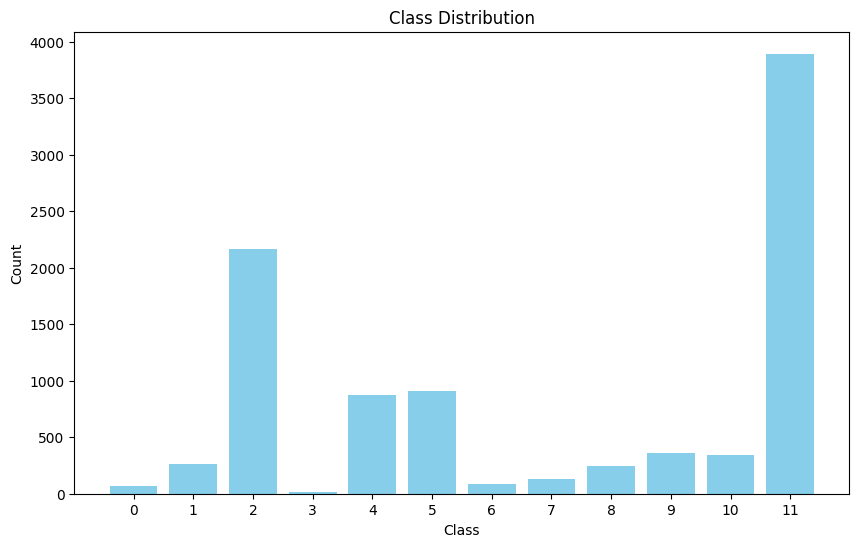

In [ ]:
class_counts = np.bincount(data["genre"])
classes = np.arange(len(class_counts))
plt.figure(figsize=(10,6))
plt.bar(classes, class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(classes)
plt.show()

As you can see, the data appears to be dominated by one class in particular. We will explore how the performance of the model changes upon removal of this class later. 


**Normalisation**

Normalisation is the process of transforming data into a set range of values. Typically data is normalised to be between 0 - 1 or -1 - 1. This makes data easier to analyse. In addition, it reduces the influence one particular feature may have. Note in our data so far "tempo" tends to have significantly higher values than other columns, this will bring "tempo" down to values more in line with the rest of the data.

Here, we will normalise our data into the 0 - 1 range

In [ ]:
# (scikit-learn, n.d.) - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler
normaliser = MinMaxScaler(feature_range=(0,1))
data[echonest.columns] = normaliser.fit_transform(data[echonest.columns])

In [ ]:
data

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre
track_id,,,,,,,,,
2,0.418434,0.682179,0.634492,1.064919e-02,0.160932,0.144310,0.645449,0.576663,5
3,0.375988,0.521350,0.817487,1.854783e-03,0.085122,0.465123,0.481252,0.269236,5
5,0.043750,0.758275,0.701489,6.981840e-04,0.367441,0.107495,0.368752,0.621664,5
10,0.955687,0.662830,0.924557,9.673460e-01,0.095256,0.010342,0.416378,0.963599,10
134,0.454126,0.504525,0.560421,1.948134e-02,0.075284,0.532678,0.427874,0.894080,5
...,...,...,...,...,...,...,...,...,...
124718,0.413934,0.694118,0.849337,6.011926e-10,0.889692,0.364901,0.351238,0.692418,5
124719,0.055205,0.618439,0.728588,7.230043e-06,0.112120,0.233202,0.351904,0.399718,5
124720,0.010521,0.656609,0.657515,7.112109e-07,0.714319,0.218402,0.346102,0.432239,5


### <a id='toc5_3_5_'></a>[Splitting the data](#toc0_)

Now we need to split the data into training and testing sets. Training sets are used for initially creating the model, and testing sets are used to evaluating the performance of a model.

In addition, the data is split into data and target values. Here, "data" is the audio features (tempo etc) and "target" are the classes (genres, like rock).

In [ ]:
data_train, data_test, target_train, target_test = train_test_split(data[echonest.columns].values, data["genre"].values, train_size=0.80)

Convert to tensors - special data type in pytorch

In [ ]:
# Convert data to PyTorch tensors
# (PyTorch, n.d.) - hhttps://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html
data_train_tensor = torch.tensor(data_train, dtype=torch.float32)
target_train_tensor = torch.tensor(target_train, dtype=torch.long)  

data_test_tensor = torch.tensor(data_test, dtype=torch.float32)
target_test_tensor = torch.tensor(target_test, dtype=torch.long)

train_dataset = TensorDataset(data_train_tensor, target_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(data_test_tensor, target_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

## <a id='toc5_4_'></a>[The Model](#toc0_)

To speed up computation, pytorch provides tools to run our models using CUDA, a system that uses the GPU for processing. It is typically recommended to use CUDA if your device is capable of it. MPS is an alternative to CUDA that your device may support instead.

In [ ]:
# (PyTorch, n.d.) - https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print("Using", device, "device")

Using cpu device



### <a id='toc5_4_1_'></a>[Defining the initial model](#toc0_)

In [ ]:
# (PyTorch, n.d.) - https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
class NeuralNetwork(nn.Module):
    # 8 features as input
    # 12 classes present in data   
    def __init__(self, input_size = 8, hidden_size1 = 10, hidden_size2 = 10, output_size = 12):
        super(NeuralNetwork, self).__init__()
        self.data_pass = nn.Sequential(OrderedDict([
            ('Linear1', nn.Linear(input_size, hidden_size1)),
            ('Sigmoid1', nn.Sigmoid()),
            ('Linear2', nn.Linear(hidden_size1, hidden_size2)),
            ('Sigmoid2', nn.Sigmoid()),
            ('Linear3',  nn.Linear(hidden_size2, output_size)),
        ]))
        
    # When model is called, such as in outputs = model(data), this function is called automatically. 
    def forward(self, x):
        logits = self.data_pass(x)
        return logits

model = NeuralNetwork().to(device)
# Loss function - calculates how well (or poorly) the model has performed
loss_function = nn.CrossEntropyLoss() 
# Optimiser - updates parameters of the model
optimiser = optim.SGD(model.parameters(), lr=0.1, momentum = 0.5)
print(model)     

NeuralNetwork(
  (data_pass): Sequential(
    (Linear1): Linear(in_features=8, out_features=10, bias=True)
    (Sigmoid1): Sigmoid()
    (Linear2): Linear(in_features=10, out_features=10, bias=True)
    (Sigmoid2): Sigmoid()
    (Linear3): Linear(in_features=10, out_features=12, bias=True)
  )
)


**Training the model**

In [ ]:
# (PyTorch, n.d.) - hhttps://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html
def train(model_name, epochs = 2000, train_loader = train_loader):
    model.train()
    for i in range(0,epochs) :
        loss_score = 0.0
        for data, target in train_loader:
            # Compute error and updating of weights
            prediction = model(data)
            loss = loss_function(prediction, target)
            loss.backward()
            optimiser.step() 
            optimiser.zero_grad()
            loss_score += loss.item() * target.size(0)    
        epoch_loss = loss_score / len(train_loader.dataset)
        if ((i+1 == 500) or (i+1==1000) or (i+1==2000)):
            # To save the state of our models at set epochs - to be discussed later
            print(f"Saving epoch {i+1}")
            torch.save(model.state_dict(),f"{model_name}_{i+1}.pth")
        if ((i+1)%100 == 0):
            # Provide updates mid-training
            print(f'Epoch [{i+1}/{epochs}], Loss: {epoch_loss:.4f}')


**Testing the model**

In [152]:
# (PyTorch, n.d.) - hhttps://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html
def test(assessing = False, test_loader = test_loader):
    all_predictions = []
    all_labels = []
    correct = 0
    model.eval()
    size = len(test_loader.dataset)
    with torch.no_grad():
        for data, target in test_loader:
            # Perform predictions
            pred = model(data)
            # Find most likely class
            correct += (pred.argmax(1) == target).type(torch.float).sum().item()
            all_predictions.extend(pred.argmax(1).cpu().numpy())  # Convert to numpy array and extend
            all_labels.extend(target.cpu().numpy())  # Convert to numpy array and extend
    if assessing:
        precision, recall, fscore, support  = precision_recall_fscore_support(all_labels, all_predictions, average='weighted')
        return correct, size, all_labels, all_predictions, precision, recall, fscore, support
    else:
        return(f"Test complete, classification accuracy: {correct/size} ({correct/size*100:.2f}%)")


In [126]:
train(model_name = "initial_model")

Epoch [100/2000], Loss: 1.1975
Epoch [200/2000], Loss: 1.1519
Epoch [300/2000], Loss: 1.1325
Epoch [400/2000], Loss: 1.1157
Saving epoch 500
Epoch [500/2000], Loss: 1.1032
Epoch [600/2000], Loss: 1.0943
Epoch [700/2000], Loss: 1.0884
Epoch [800/2000], Loss: 1.0838
Epoch [900/2000], Loss: 1.0796
Saving epoch 1000
Epoch [1000/2000], Loss: 1.0777
Epoch [1100/2000], Loss: 1.0736
Epoch [1200/2000], Loss: 1.0712
Epoch [1300/2000], Loss: 1.0698
Epoch [1400/2000], Loss: 1.0687
Epoch [1500/2000], Loss: 1.0668
Epoch [1600/2000], Loss: 1.0655
Epoch [1700/2000], Loss: 1.0647
Epoch [1800/2000], Loss: 1.0647
Epoch [1900/2000], Loss: 1.0622
Saving epoch 2000
Epoch [2000/2000], Loss: 1.0612


**Saving the model**

Now our model is trained, we will now save the state of the model for later testing and comparison to other models. The below code will show  how to save the state of a model and load it again.

In [127]:
# (PyTorch, n.d.) - https://pytorch.org/tutorials/beginner/saving_loading_models.html
# Save the model
torch.save(model.state_dict(),"initial_model_save_test.pth")

In [128]:
# Load the model 
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("initial_model_save_test.pth"))

<All keys matched successfully>

### <a id='toc5_4_2_'></a>[Assessing the results](#toc0_)

Now that we have trained a model, we need to assess how it has performed. 
We will use the following metrics for assessment:
* A confusion matrix, this is a plot that shows all predictions made by our model, and whether those predictions fell within the actual class of the data. It is a good visual indicator of if the model is working as intended.
* Classification accuracy, the overall correctness of the model's predictions
* Precision, the model's ability  to correctly predict positive instances among all instances that are positive. In this metric, along with the following ones, we are taking the average precision across all classes. This is due to the many classes we have
* Recall, this is the model's ability to capture positive instances.
* F-score, the mean of precision and recall. The closer to 1, the better. It helps show if you have a balance of precision and recall, which can be beneficial when there is an uneven class distribution (like we have here).

c:\Users\seanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x800 with 0 Axes>

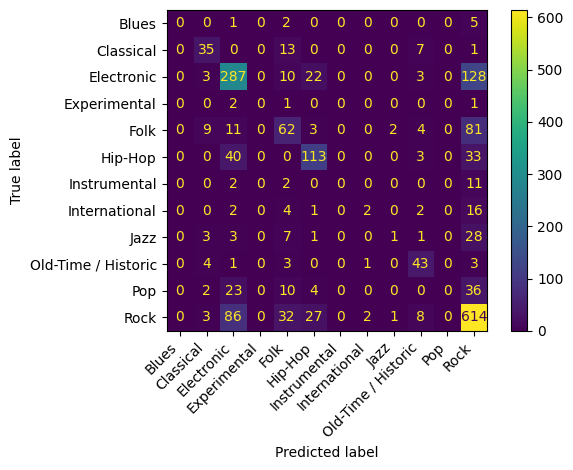

Classification accuracy: 0.62 (61.84%)
Precision: 0.57
Recall: 0.62
F-score: 0.59


In [150]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("initial_model_2000.pth"))
labels = np.unique(le.inverse_transform(data["genre"]))
correct, size, all_labels, all_predictions, precision, recall, fscore, support = test(assessing=True)
matrix = confusion_matrix(all_labels,all_predictions)
plt.figure(figsize=(10,8))
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels) 
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(f"Classification accuracy: {correct/size:.2f} ({correct/size*100:.2f}%)")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-score: {fscore:.2f}")

From these results we can see that the model has managed to correctly classify most of the tracks, but an accuracy of around 62% after 2000 epochs is somewhat low. \
In addition, we can also see that the model is struggling in terms of identifying class imbalances, due to its low precision, recall, and f-score. \
We will now look to improve the performance of the model, by exploring it's hyper-parameters.


## <a id='toc5_5_'></a>[Exploration of Hyper-parameters and other configurations](#toc0_)

### <a id='toc5_5_1_'></a>[Introduction](#toc0_)

Hyper-parameters refer to the configurations that form the learning process of a neural network. Typically, the ideal configurations for a model can be discovered through trial and error of these different configurations.

In addition, we will look at other ways to improve our results that don't necessarily fall under hyper-parameters. As we go along in these configurations, we will test these models and then at the end compare results to infrom how we can combine these configurations to create a newer, more optimal model.

### <a id='toc5_5_2_'></a>[Epochs](#toc0_)

An epoch refers to one pass through the training dataset, so the number of epochs number refers to the amount to times the model will train itself. While you may achieve a higher level of accuracy by training the model for more epochs, there are some considerations to be had:
* Time of computation - more epochs means longer training times.
* Over-fitting - this is a problem in machine learning that involves the model being tuned too specifically to training data that it performs poorly when new, unseen (testing), data is introduced. This can come as a result of too many epochs in training. 

For the testing of these hyperparameter configurations, each model will be tested with epoch values of 500, 1,000, and 2,000. This is to demonstrate how epochs can affect a model's performance over time. \
Our training function automatically saves the state of our model at these epochs, so no changes need to made for this.


### <a id='toc5_5_3_'></a>[Number of layers](#toc0_)

Our initial model uses 2 hidden layers, we will define a new model that is identical to the old one but with a layer removed and observe how performance changes.
We will use this model in two configurations: one with 100 neurons in the hidden layer, and one with 200 neurons.


In [134]:
class OneHiddenLayerNN(nn.Module):
    # 8 features as input
    # 12 classes present in data   
    def __init__(self, input_size = 8, hidden_size1 = 100, output_size = 12):
        super(OneHiddenLayerNN, self).__init__()
        self.data_pass = nn.Sequential(OrderedDict([
            ('Linear1', nn.Linear(input_size, hidden_size1)),
            ('Sigmoid1', nn.Sigmoid()),
            ('Linear2',  nn.Linear(hidden_size1, output_size)),
        ]))
        
    def forward(self, x):
        logits = self.data_pass(x)
        return logits

model = OneHiddenLayerNN().to(device)
loss_function = nn.CrossEntropyLoss() 
optimiser = optim.SGD(model.parameters(), lr=0.1, momentum = 0.5)
print(model)     

OneHiddenLayerNN(
  (data_pass): Sequential(
    (Linear1): Linear(in_features=8, out_features=100, bias=True)
    (Sigmoid1): Sigmoid()
    (Linear2): Linear(in_features=100, out_features=12, bias=True)
  )
)


In [135]:
train(model_name="one_hl_100")

Epoch [100/2000], Loss: 1.1882
Epoch [200/2000], Loss: 1.1557
Epoch [300/2000], Loss: 1.1357
Epoch [400/2000], Loss: 1.1212
Saving epoch 500
Epoch [500/2000], Loss: 1.1071
Epoch [600/2000], Loss: 1.0947
Epoch [700/2000], Loss: 1.0835
Epoch [800/2000], Loss: 1.0734
Epoch [900/2000], Loss: 1.0638
Saving epoch 1000
Epoch [1000/2000], Loss: 1.0560
Epoch [1100/2000], Loss: 1.0462
Epoch [1200/2000], Loss: 1.0388
Epoch [1300/2000], Loss: 1.0316
Epoch [1400/2000], Loss: 1.0242
Epoch [1500/2000], Loss: 1.0198
Epoch [1600/2000], Loss: 1.0144
Epoch [1700/2000], Loss: 1.0106
Epoch [1800/2000], Loss: 1.0046
Epoch [1900/2000], Loss: 1.0003
Saving epoch 2000
Epoch [2000/2000], Loss: 0.9964


In [151]:
model = OneHiddenLayerNN().to(device)
model_test_name = "one_hl_100"
model.load_state_dict(torch.load(f"{model_test_name}_500.pth"))
print("Testing at epochs 500, 1000, and 2000")
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_1000.pth"))
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_2000.pth"))
print(test())

Testing at epochs 500, 1000, and 2000
Test complete, classification accuracy: 0.6194548369855692 (61.95%)
Test complete, classification accuracy: 0.6226616782469268 (62.27%)
Test complete, classification accuracy: 0.6280064136825227 (62.80%)


In [137]:
model = OneHiddenLayerNN(hidden_size1=200).to(device)
loss_function = nn.CrossEntropyLoss() 
optimiser = optim.SGD(model.parameters(), lr=0.1, momentum = 0.5)
train(model_name="one_hl_200")

Epoch [100/2000], Loss: 1.2031
Epoch [200/2000], Loss: 1.1624
Epoch [300/2000], Loss: 1.1452
Epoch [400/2000], Loss: 1.1319
Saving epoch 500
Epoch [500/2000], Loss: 1.1194
Epoch [600/2000], Loss: 1.1084
Epoch [700/2000], Loss: 1.0952
Epoch [800/2000], Loss: 1.0837
Epoch [900/2000], Loss: 1.0738
Saving epoch 1000
Epoch [1000/2000], Loss: 1.0653
Epoch [1100/2000], Loss: 1.0580
Epoch [1200/2000], Loss: 1.0521
Epoch [1300/2000], Loss: 1.0436
Epoch [1400/2000], Loss: 1.0360
Epoch [1500/2000], Loss: 1.0299
Epoch [1600/2000], Loss: 1.0232
Epoch [1700/2000], Loss: 1.0184
Epoch [1800/2000], Loss: 1.0115
Epoch [1900/2000], Loss: 1.0095
Saving epoch 2000
Epoch [2000/2000], Loss: 1.0052


In [138]:
model = OneHiddenLayerNN(hidden_size1=200).to(device)
model_test_name = "one_hl_200"
model.load_state_dict(torch.load(f"{model_test_name}_500.pth"))
print("Testing at epochs 500, 1000, and 2000")
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_1000.pth"))
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_2000.pth"))
print(test())

Testing at epochs 500, 1000, and 2000
Test complete, classification accuracy: 0.6114377338321753 (61.14%)
Test complete, classification accuracy: 0.6178514163548904 (61.79%)
Test complete, classification accuracy: 0.6301443078567611 (63.01%)


### <a id='toc5_5_4_'></a>[Layer neurons](#toc0_)

This refers to the amount of neurons in the hidden layers in the model. \
In addition, both of the layers in our initial model used the same amount of neurons, we will also look to see how using less neurons in the second layer affects performance.

We will use 64x32 neurons, then 128x64 neurons and observe results.


In [53]:
model = NeuralNetwork(hidden_size1=64, hidden_size2=32).to(device)
loss_function = nn.CrossEntropyLoss() 
optimiser = optim.SGD(model.parameters(), lr=0.1, momentum = 0.5)
train(model_name="two_hl_64x32")

Epoch [100/2000], Loss: 1.1777
Epoch [200/2000], Loss: 1.1366
Epoch [300/2000], Loss: 1.1137
Epoch [400/2000], Loss: 1.0957
Saving epoch 500
Epoch [500/2000], Loss: 1.0798
Epoch [600/2000], Loss: 1.0666
Epoch [700/2000], Loss: 1.0517
Epoch [800/2000], Loss: 1.0384
Epoch [900/2000], Loss: 1.0287
Saving epoch 1000
Epoch [1000/2000], Loss: 1.0191
Epoch [1100/2000], Loss: 1.0099
Epoch [1200/2000], Loss: 1.0018
Epoch [1300/2000], Loss: 0.9923
Epoch [1400/2000], Loss: 0.9850
Epoch [1500/2000], Loss: 0.9779
Epoch [1600/2000], Loss: 0.9671
Epoch [1700/2000], Loss: 0.9570
Epoch [1800/2000], Loss: 0.9504
Epoch [1900/2000], Loss: 0.9423
Saving epoch 2000
Epoch [2000/2000], Loss: 0.9362


In [139]:
model = NeuralNetwork(hidden_size1=64, hidden_size2=32).to(device)
model_test_name = "two_hl_64x32"
model.load_state_dict(torch.load(f"{model_test_name}_500.pth"))
print("Testing at epochs 500, 1000, and 2000")
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_1000.pth"))
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_2000.pth"))
print(test())

Testing at epochs 500, 1000, and 2000
Test complete, classification accuracy: 0.6360235168359166 (63.60%)
Test complete, classification accuracy: 0.6456440406199893 (64.56%)
Test complete, classification accuracy: 0.6670229823623731 (66.70%)


In [54]:
model = NeuralNetwork(hidden_size1=128, hidden_size2=64).to(device)
loss_function = nn.CrossEntropyLoss() 
optimiser = optim.SGD(model.parameters(), lr=0.1, momentum = 0.5)
train(model_name="two_hl_128x64")

Epoch [100/2000], Loss: 1.1776
Epoch [200/2000], Loss: 1.1420
Epoch [300/2000], Loss: 1.1163
Epoch [400/2000], Loss: 1.0952
Saving epoch 500
Epoch [500/2000], Loss: 1.0752
Epoch [600/2000], Loss: 1.0582
Epoch [700/2000], Loss: 1.0435
Epoch [800/2000], Loss: 1.0296
Epoch [900/2000], Loss: 1.0169
Saving epoch 1000
Epoch [1000/2000], Loss: 1.0047
Epoch [1100/2000], Loss: 0.9908
Epoch [1200/2000], Loss: 0.9802
Epoch [1300/2000], Loss: 0.9701
Epoch [1400/2000], Loss: 0.9555
Epoch [1500/2000], Loss: 0.9473
Epoch [1600/2000], Loss: 0.9336
Epoch [1700/2000], Loss: 0.9232
Epoch [1800/2000], Loss: 0.9090
Epoch [1900/2000], Loss: 0.8988
Saving epoch 2000
Epoch [2000/2000], Loss: 0.8868


In [140]:
model = NeuralNetwork(hidden_size1=128, hidden_size2=64).to(device)
model_test_name = "two_hl_128x64"
model.load_state_dict(torch.load(f"{model_test_name}_500.pth"))
print("Testing at epochs 500, 1000, and 2000")
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_1000.pth"))
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_2000.pth"))
print(test())

Testing at epochs 500, 1000, and 2000
Test complete, classification accuracy: 0.6349545697487974 (63.50%)
Test complete, classification accuracy: 0.6515232495991449 (65.15%)
Test complete, classification accuracy: 0.672367717797969 (67.24%)


### <a id='toc5_5_5_'></a>[Activation functions](#toc0_)

This refers to the sigmoid function, which we used in our initial model. Instead we will use ReLU. \
This is a different function to sigmoid that has picked up greater popularity, and is generally favoured for tasks like deep neural networks. \
Like we did for using only one hidden layer, we will have to define a new model here.

In [56]:
class ReLUNN(nn.Module):
    # 8 features as input
    # 12 classes present in data   
    def __init__(self, input_size = 8, hidden_size1 = 10, hidden_size2 = 10, output_size = 12):
        super(ReLUNN, self).__init__()
        self.data_pass = nn.Sequential(OrderedDict([
            ('Linear1', nn.Linear(input_size, hidden_size1)),
            ('ReLU1', nn.ReLU()),
            ('Linear2', nn.Linear(hidden_size1, hidden_size2)),
            ('ReLU2', nn.ReLU()),
            ('Linear3',  nn.Linear(hidden_size2, output_size)),
        ]))
        
    def forward(self, x):
        logits = self.data_pass(x)
        return logits

model = ReLUNN().to(device)
loss_function = nn.CrossEntropyLoss() 
optimiser = optim.SGD(model.parameters(), lr=0.1, momentum = 0.5)

In [57]:
train(model_name="relu_model")

Epoch [100/2000], Loss: 1.1262
Epoch [200/2000], Loss: 1.1091
Epoch [300/2000], Loss: 1.0973
Epoch [400/2000], Loss: 1.0937
Saving epoch 500
Epoch [500/2000], Loss: 1.0883
Epoch [600/2000], Loss: 1.0863
Epoch [700/2000], Loss: 1.0822
Epoch [800/2000], Loss: 1.0849
Epoch [900/2000], Loss: 1.0800
Saving epoch 1000
Epoch [1000/2000], Loss: 1.0791
Epoch [1100/2000], Loss: 1.0763
Epoch [1200/2000], Loss: 1.0737
Epoch [1300/2000], Loss: 1.0724
Epoch [1400/2000], Loss: 1.0708
Epoch [1500/2000], Loss: 1.0724
Epoch [1600/2000], Loss: 1.0694
Epoch [1700/2000], Loss: 1.0678
Epoch [1800/2000], Loss: 1.0714
Epoch [1900/2000], Loss: 1.0678
Saving epoch 2000
Epoch [2000/2000], Loss: 1.0714


In [141]:
model = ReLUNN().to(device)
model_test_name = "relu_model"
model.load_state_dict(torch.load(f"{model_test_name}_500.pth"))
print("Testing at epochs 500, 1000, and 2000")
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_1000.pth"))
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_2000.pth"))
print(test())

Testing at epochs 500, 1000, and 2000
Test complete, classification accuracy: 0.6312132549438803 (63.12%)
Test complete, classification accuracy: 0.6274719401389631 (62.75%)
Test complete, classification accuracy: 0.6317477284874399 (63.17%)


### <a id='toc5_5_6_'></a>[Learning rate and optimisers](#toc0_)

Learning rate refers to how much the model's parameters are updated during training, meaning the speed in which it learns. 
In our code defining our model, learning rate is the "l" parameter in the optimiser.\
Optimisers are the algorithms used to update parameters. We will look to see how different optimisers and learning rates affect performance. 

In this exploration, we will use the following configurations:
Learning rates of 0.25 and 0.5 for the SGD optimiser, and these learning rates again for a new optimiser, called Adam (Kingma & Ba, 2017). \
Adam is like SGD (our original optimiser) in that it incorporates momentum, but also adapts the learning rate for it's parameters in a more advanced way, such as looking at past performance.

In [58]:
model = NeuralNetwork().to(device)
loss_function = nn.CrossEntropyLoss() 
optimiser = optim.SGD(model.parameters(), lr=0.25, momentum = 0.5)
train(model_name="sgd_0.25")

Epoch [100/2000], Loss: 1.1462
Epoch [200/2000], Loss: 1.1103
Epoch [300/2000], Loss: 1.0953
Epoch [400/2000], Loss: 1.0882
Saving epoch 500
Epoch [500/2000], Loss: 1.0830
Epoch [600/2000], Loss: 1.0786
Epoch [700/2000], Loss: 1.0757
Epoch [800/2000], Loss: 1.0699
Epoch [900/2000], Loss: 1.0680
Saving epoch 1000
Epoch [1000/2000], Loss: 1.0665
Epoch [1100/2000], Loss: 1.0652
Epoch [1200/2000], Loss: 1.0641
Epoch [1300/2000], Loss: 1.0627
Epoch [1400/2000], Loss: 1.0622
Epoch [1500/2000], Loss: 1.0616
Epoch [1600/2000], Loss: 1.0604
Epoch [1700/2000], Loss: 1.0611
Epoch [1800/2000], Loss: 1.0577
Epoch [1900/2000], Loss: 1.0589
Saving epoch 2000
Epoch [2000/2000], Loss: 1.0583


In [142]:
model = NeuralNetwork().to(device)
model_test_name = "sgd_0.25"
model.load_state_dict(torch.load(f"{model_test_name}_500.pth"))
print("Testing at epochs 500, 1000, and 2000")
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_1000.pth"))
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_2000.pth"))
print(test())

Testing at epochs 500, 1000, and 2000
Test complete, classification accuracy: 0.6301443078567611 (63.01%)
Test complete, classification accuracy: 0.6215927311598076 (62.16%)
Test complete, classification accuracy: 0.6370924639230358 (63.71%)


In [59]:
model = NeuralNetwork().to(device)
loss_function = nn.CrossEntropyLoss() 
optimiser = optim.SGD(model.parameters(), lr=0.5, momentum = 0.5)
train(model_name="sgd_0.5")

Epoch [100/2000], Loss: 1.1301
Epoch [200/2000], Loss: 1.0991
Epoch [300/2000], Loss: 1.0833
Epoch [400/2000], Loss: 1.0842
Saving epoch 500
Epoch [500/2000], Loss: 1.0786
Epoch [600/2000], Loss: 1.0770
Epoch [700/2000], Loss: 1.0723
Epoch [800/2000], Loss: 1.0687
Epoch [900/2000], Loss: 1.0658
Saving epoch 1000
Epoch [1000/2000], Loss: 1.0673
Epoch [1100/2000], Loss: 1.0647
Epoch [1200/2000], Loss: 1.0647
Epoch [1300/2000], Loss: 1.0625
Epoch [1400/2000], Loss: 1.0600
Epoch [1500/2000], Loss: 1.0594
Epoch [1600/2000], Loss: 1.0593
Epoch [1700/2000], Loss: 1.0599
Epoch [1800/2000], Loss: 1.0576
Epoch [1900/2000], Loss: 1.0547
Saving epoch 2000
Epoch [2000/2000], Loss: 1.0558


In [143]:
model = NeuralNetwork().to(device)
model_test_name = "sgd_0.5"
model.load_state_dict(torch.load(f"{model_test_name}_500.pth"))
print("Testing at epochs 500, 1000, and 2000")
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_1000.pth"))
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_2000.pth"))
print(test())

Testing at epochs 500, 1000, and 2000
Test complete, classification accuracy: 0.6392303580972741 (63.92%)
Test complete, classification accuracy: 0.6344200962052379 (63.44%)
Test complete, classification accuracy: 0.638161411010155 (63.82%)


In [60]:
model = NeuralNetwork().to(device)
loss_function = nn.CrossEntropyLoss() 
optimiser = optim.Adam(model.parameters(), lr=0.25)
train(model_name="adam_0.25")

Epoch [100/2000], Loss: 1.2276
Epoch [200/2000], Loss: 1.2160
Epoch [300/2000], Loss: 1.2323
Epoch [400/2000], Loss: 1.2329
Saving epoch 500
Epoch [500/2000], Loss: 1.2341
Epoch [600/2000], Loss: 1.2430
Epoch [700/2000], Loss: 1.2317
Epoch [800/2000], Loss: 1.2324
Epoch [900/2000], Loss: 1.2245
Saving epoch 1000
Epoch [1000/2000], Loss: 1.2221
Epoch [1100/2000], Loss: 1.2299
Epoch [1200/2000], Loss: 1.2236
Epoch [1300/2000], Loss: 1.2339
Epoch [1400/2000], Loss: 1.2383
Epoch [1500/2000], Loss: 1.2247
Epoch [1600/2000], Loss: 1.2253
Epoch [1700/2000], Loss: 1.2440
Epoch [1800/2000], Loss: 1.2956
Epoch [1900/2000], Loss: 1.2714
Saving epoch 2000
Epoch [2000/2000], Loss: 1.2762


In [144]:
model = NeuralNetwork().to(device)
model_test_name = "adam_0.25"
model.load_state_dict(torch.load(f"{model_test_name}_500.pth"))
print("Testing at epochs 500, 1000, and 2000")
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_1000.pth"))
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_2000.pth"))
print(test())

Testing at epochs 500, 1000, and 2000
Test complete, classification accuracy: 0.5980758952431855 (59.81%)
Test complete, classification accuracy: 0.5996793158738642 (59.97%)
Test complete, classification accuracy: 0.5820416889363976 (58.20%)


In [61]:
model = NeuralNetwork().to(device)
loss_function = nn.CrossEntropyLoss() 
optimiser = optim.Adam(model.parameters(), lr=0.5)
train(model_name="adam_0.5")

Epoch [100/2000], Loss: 1.7701
Epoch [200/2000], Loss: 1.7629
Epoch [300/2000], Loss: 1.7707
Epoch [400/2000], Loss: 1.7716
Saving epoch 500
Epoch [500/2000], Loss: 1.7688
Epoch [600/2000], Loss: 1.7686
Epoch [700/2000], Loss: 1.7693
Epoch [800/2000], Loss: 1.7692
Epoch [900/2000], Loss: 1.7721
Saving epoch 1000
Epoch [1000/2000], Loss: 1.7634
Epoch [1100/2000], Loss: 1.7698
Epoch [1200/2000], Loss: 1.7768
Epoch [1300/2000], Loss: 1.7698
Epoch [1400/2000], Loss: 1.7679
Epoch [1500/2000], Loss: 1.7584
Epoch [1600/2000], Loss: 1.7683
Epoch [1700/2000], Loss: 1.7736
Epoch [1800/2000], Loss: 1.7735
Epoch [1900/2000], Loss: 1.7760
Saving epoch 2000
Epoch [2000/2000], Loss: 1.7685


In [145]:
model = NeuralNetwork().to(device)
model_test_name = "adam_0.5"
model.load_state_dict(torch.load(f"{model_test_name}_500.pth"))
print("Testing at epochs 500, 1000, and 2000")
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_1000.pth"))
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_2000.pth"))
print(test())

Testing at epochs 500, 1000, and 2000
Test complete, classification accuracy: 0.413148049171566 (41.31%)
Test complete, classification accuracy: 0.413148049171566 (41.31%)
Test complete, classification accuracy: 0.242116515232496 (24.21%)


### <a id='toc5_5_7_'></a>[Other configurations: removing certain classes](#toc0_)

As we have observed, the data is dominated by 2 classes in particular, and as a result, lots of tracks tend to get classified into these two classes. 
We will observe how remove these 2 dominant classes changes performance. \
We will first remove the dominant class, then the top two dominant classes.
From the graph earlier in this tutorial, these are classes 11 and 2.

However, doing this will involve re-normalising and re-encoding our data, creating a new dataset with those classes removed, then splitting our data into training and testing again. The process is shown below.


In [93]:
data[echonest.columns] = normaliser.inverse_transform(data[echonest.columns])
data

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre
track_id,,,,,,,,,
2,0.418434,0.682937,0.634492,1.064919e-02,0.164429,0.144310,0.644244,0.576663,5
3,0.375988,0.522492,0.817487,1.854783e-03,0.088936,0.465123,0.480354,0.269236,5
5,0.043750,0.758852,0.701489,6.981840e-04,0.370078,0.107495,0.368063,0.621664,5
10,0.955687,0.663634,0.924557,9.673460e-01,0.099028,0.010342,0.415601,0.963599,10
134,0.454126,0.505706,0.560421,1.948134e-02,0.079139,0.532678,0.427075,0.894080,5
...,...,...,...,...,...,...,...,...,...
124718,0.413934,0.694848,0.849337,6.011926e-10,0.890152,0.364901,0.350583,0.692418,5
124719,0.055205,0.619349,0.728588,7.230043e-06,0.115821,0.233202,0.351247,0.399718,5
124720,0.010521,0.657428,0.657515,7.112109e-07,0.715510,0.218402,0.345456,0.432239,5


In [95]:
data_11_gone = data[~data['genre'].isin([11])]
data_11_gone[echonest.columns] = normaliser.fit_transform(data_11_gone[echonest.columns])
data_11_gone["genre"] = le.inverse_transform(data_11_gone["genre"])
le_11 = LabelEncoder()
data_11_gone["genre"] = le_11.fit_transform(data_11_gone["genre"])
data_11_gone

C:\Users\seanm\AppData\Local\Temp\ipykernel_22640\1438738143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_11_gone[echonest.columns] = normaliser.fit_transform(data_11_gone[echonest.columns])
C:\Users\seanm\AppData\Local\Temp\ipykernel_22640\1438738143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_11_gone["genre"] = (le.inverse_transform(data_11_gone["genre"]))
C:\Users\seanm\AppData\Local\Temp\ipykernel_22640\1438738143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a c

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre
track_id,,,,,,,,,
2,0.418434,0.681419,0.634492,1.064919e-02,0.157419,0.144310,0.646657,0.576663,5
3,0.375988,0.520206,0.817487,1.854783e-03,0.081292,0.465123,0.482152,0.269236,5
5,0.043750,0.757697,0.701489,6.981840e-04,0.364793,0.107495,0.369441,0.621664,5
10,0.955687,0.662024,0.924557,9.673460e-01,0.091469,0.010342,0.417157,0.963599,10
134,0.454126,0.503340,0.560421,1.948134e-02,0.071413,0.532678,0.428674,0.894080,5
...,...,...,...,...,...,...,...,...,...
124718,0.413934,0.693387,0.849337,6.011926e-10,0.889230,0.364901,0.351895,0.692418,5
124719,0.055205,0.617527,0.728588,7.230043e-06,0.108403,0.233202,0.352562,0.399718,5
124720,0.010521,0.655788,0.657515,7.112109e-07,0.713123,0.218402,0.346749,0.432239,5


Now that the column is removed, we can split the data, and train and test the model

In [64]:
data_train, data_test, target_train, target_test = train_test_split(data_11_gone[echonest.columns].values, data_11_gone["genre"].values, train_size=0.80)

In [65]:
# Convert data to PyTorch tensors
data_train_tensor = torch.tensor(data_train, dtype=torch.float32)
target_train_tensor = torch.tensor(target_train, dtype=torch.long)  

data_test_tensor = torch.tensor(data_test, dtype=torch.float32)
target_test_tensor = torch.tensor(target_test, dtype=torch.long)

train_dataset = TensorDataset(data_train_tensor, target_train_tensor)
train_loader_11_gone = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(data_test_tensor, target_test_tensor)
test_loader_11_gone = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [66]:
model = NeuralNetwork(output_size=11).to(device)
loss_function = nn.CrossEntropyLoss() 
optimiser = optim.SGD(model.parameters(), lr=0.1, momentum = 0.5)
train(model_name="class_11_gone",train_loader=train_loader_11_gone)

Epoch [100/2000], Loss: 1.2521
Epoch [200/2000], Loss: 1.1792
Epoch [300/2000], Loss: 1.1453
Epoch [400/2000], Loss: 1.1162
Saving epoch 500
Epoch [500/2000], Loss: 1.0973
Epoch [600/2000], Loss: 1.0865
Epoch [700/2000], Loss: 1.0749
Epoch [800/2000], Loss: 1.0670
Epoch [900/2000], Loss: 1.0618
Saving epoch 1000
Epoch [1000/2000], Loss: 1.0552
Epoch [1100/2000], Loss: 1.0521
Epoch [1200/2000], Loss: 1.0467
Epoch [1300/2000], Loss: 1.0398
Epoch [1400/2000], Loss: 1.0381
Epoch [1500/2000], Loss: 1.0376
Epoch [1600/2000], Loss: 1.0321
Epoch [1700/2000], Loss: 1.0277
Epoch [1800/2000], Loss: 1.0261
Epoch [1900/2000], Loss: 1.0253
Saving epoch 2000
Epoch [2000/2000], Loss: 1.0231


In [146]:
model = NeuralNetwork(output_size=11).to(device)
model_test_name = "class_11_gone"
model.load_state_dict(torch.load(f"{model_test_name}_500.pth"))
print("Testing at epochs 500, 1000, and 2000")
print(test(test_loader=test_loader_11_gone))
model.load_state_dict(torch.load(f"{model_test_name}_1000.pth"))
print(test(test_loader=test_loader_11_gone))
model.load_state_dict(torch.load(f"{model_test_name}_2000.pth"))
print(test(test_loader=test_loader_11_gone))

Testing at epochs 500, 1000, and 2000
Test complete, classification accuracy: 0.6395242451967064 (63.95%)
Test complete, classification accuracy: 0.6486733760292772 (64.87%)
Test complete, classification accuracy: 0.6514181152790485 (65.14%)


And now the same again for removing classes 11 and 2 

In [97]:
data_2_11_gone = data[~data['genre'].isin([2, 11])]
data_2_11_gone[echonest.columns] = normaliser.fit_transform(data_2_11_gone[echonest.columns])
data_2_11_gone["genre"] = le.inverse_transform(data_2_11_gone["genre"])
le_2_11 = LabelEncoder()
data_2_11_gone["genre"] = le_2_11.fit_transform(data_2_11_gone["genre"])
data_2_11_gone

C:\Users\seanm\AppData\Local\Temp\ipykernel_22640\486911157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_11_gone[echonest.columns] = normaliser.fit_transform(data_2_11_gone[echonest.columns])
C:\Users\seanm\AppData\Local\Temp\ipykernel_22640\486911157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_11_gone["genre"] = le.inverse_transform(data_2_11_gone["genre"])
C:\Users\seanm\AppData\Local\Temp\ipykernel_22640\486911157.py:5: SettingWithCopyWarning: 
A value is trying to be set on 

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre
track_id,,,,,,,,,
2,0.418431,0.685179,0.634763,1.064919e-02,0.156034,0.144310,0.636045,0.584578,4
3,0.375985,0.523076,0.817836,1.854783e-03,0.079782,0.465123,0.466600,0.272931,4
5,0.043745,0.761878,0.701789,6.981840e-04,0.363749,0.107495,0.350505,0.630196,4
10,0.955687,0.665677,0.924952,9.673460e-01,0.089976,0.010342,0.399653,0.976825,9
134,0.454123,0.506118,0.560661,1.948134e-02,0.069887,0.532678,0.411516,0.906352,4
...,...,...,...,...,...,...,...,...,...
124718,0.413931,0.697213,0.849700,6.011926e-10,0.889048,0.364901,0.332432,0.701922,4
124719,0.055200,0.620934,0.728899,7.230043e-06,0.106938,0.233202,0.333119,0.405204,4
124720,0.010516,0.659407,0.657795,7.112109e-07,0.712652,0.218402,0.327131,0.438172,4


In [98]:
data_train, data_test, target_train, target_test = train_test_split(data_2_11_gone[echonest.columns].values, data_2_11_gone["genre"].values, train_size=0.80)

In [99]:
# Convert data to PyTorch tensors
data_train_tensor = torch.tensor(data_train, dtype=torch.float32)
target_train_tensor = torch.tensor(target_train, dtype=torch.long)  

data_test_tensor = torch.tensor(data_test, dtype=torch.float32)
target_test_tensor = torch.tensor(target_test, dtype=torch.long)

train_dataset = TensorDataset(data_train_tensor, target_train_tensor)
train_loader_2_11_gone = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(data_test_tensor, target_test_tensor)
test_loader_2_11_gone = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [100]:
model = NeuralNetwork(output_size=10).to(device)
loss_function = nn.CrossEntropyLoss() 
optimiser = optim.SGD(model.parameters(), lr=0.1, momentum = 0.5)
train(model_name="class_2_11_gone",train_loader=train_loader_2_11_gone)

Epoch [100/2000], Loss: 1.3593
Epoch [200/2000], Loss: 1.2314
Epoch [300/2000], Loss: 1.2051
Epoch [400/2000], Loss: 1.1794
Saving epoch 500
Epoch [500/2000], Loss: 1.1524
Epoch [600/2000], Loss: 1.1314
Epoch [700/2000], Loss: 1.1098
Epoch [800/2000], Loss: 1.0991
Epoch [900/2000], Loss: 1.0872
Saving epoch 1000
Epoch [1000/2000], Loss: 1.0756
Epoch [1100/2000], Loss: 1.0640
Epoch [1200/2000], Loss: 1.0561
Epoch [1300/2000], Loss: 1.0483
Epoch [1400/2000], Loss: 1.0392
Epoch [1500/2000], Loss: 1.0363
Epoch [1600/2000], Loss: 1.0295
Epoch [1700/2000], Loss: 1.0206
Epoch [1800/2000], Loss: 1.0182
Epoch [1900/2000], Loss: 1.0180
Saving epoch 2000
Epoch [2000/2000], Loss: 1.0041


In [147]:
model = NeuralNetwork(output_size=10).to(device)
model_test_name = "class_2_11_gone"
model.load_state_dict(torch.load(f"{model_test_name}_500.pth"))
print("Testing at epochs 500, 1000, and 2000")
print(test(test_loader=test_loader_2_11_gone))
model.load_state_dict(torch.load(f"{model_test_name}_1000.pth"))
print(test(test_loader=test_loader_2_11_gone))
model.load_state_dict(torch.load(f"{model_test_name}_2000.pth"))
print(test(test_loader=test_loader_2_11_gone))

Testing at epochs 500, 1000, and 2000


Test complete, classification accuracy: 0.6145675265553869 (61.46%)
Test complete, classification accuracy: 0.6342943854324734 (63.43%)
Test complete, classification accuracy: 0.6418816388467374 (64.19%)


### <a id='toc5_5_8_'></a>[Results](#toc0_)

We will also test the results of our initial model again.

In [148]:
model = NeuralNetwork().to(device)
model_test_name = "initial_model"
model.load_state_dict(torch.load(f"{model_test_name}_500.pth"))
print("Testing at epochs 500, 1000, and 2000")
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_1000.pth"))
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_2000.pth"))
print(test())

Testing at epochs 500, 1000, and 2000
Test complete, classification accuracy: 0.6205237840726884 (62.05%)
Test complete, classification accuracy: 0.6242650988776055 (62.43%)
Test complete, classification accuracy: 0.61838588989845 (61.84%)



Below is a table of the results of all the testing we have conducted through these different configurations of the model, as a %. This is the **classification accuracy** of the models. 
Each model has it's performance shown after the amount of epochs stated earlier. 
This is to show how the individual changes have affected performance as well as how those models develop over time.


| **Model\Epochs**           | 500   | 1000 | 2000 |
|----------------------------|-------|------|------|
| Initial Model              | 62.05      |  62.43    |   61.84   |
| One HL: 100                | 61.95      |  62.27    |   62.80   |
| One HL: 200                |  61.14     |  61.79    |   63.01   |
| 2 HL: 64 & 32              |  63.60     |  64.56    |   66.70   |
| 2 HL: 128 & 64             |  63.50     |  65.15    |   67.24   |
| ReLU                       |  63.12     |  62.75    |   63.17   |
| SGD: L = 0.25              |  63.01     |  62.16    |   63.71   |
| SGD: L = 0.5               |  63.92     | 63.44     |  63.82    |
| Adam: L = 0.25             |  59.81     | 59.97     |  58.20    |
| Adam: L = 0.5              |    41.31   |   41.31   |    24.21  |
| Class 11 removed           |  63.95     |  64.87    |   65.14   |
| Class 11&2 removed         |  61.46     |  63.43    |  64.19    |

We will now combine the top performing changes into a new model, assess the performance of this model in more depth, and contrast to the initial model. \
From the table, we can see that the changes that are improving accuracy the most compared to the initial model are:
* Using two hidden layers of 128x64
* Using the ReLU activation function
* Using SGD with L = 0.5
* Removing class 11

For a fairer comparison, we will compare our new model with the initial model, then see how it performs on the dataset with class 11 removed. This is due to the initial model not being trained on that dataset.

By combining these different changes, our new model is now:

In [154]:
class OptimisedNeuralNetwork(nn.Module):
    # 8 features as input
    # 12 classes present in data   
    def __init__(self, input_size = 8, hidden_size1 = 128, hidden_size2 = 64, output_size = 12):
        super(OptimisedNeuralNetwork, self).__init__()
        self.data_pass = nn.Sequential(OrderedDict([
            ('Linear1', nn.Linear(input_size, hidden_size1)),
            ('ReLU1', nn.ReLU()),
            ('Linear2', nn.Linear(hidden_size1, hidden_size2)),
            ('ReLU2', nn.ReLU()),
            ('Linear3',  nn.Linear(hidden_size2, output_size)),
        ]))
        
    # When model is called, such as in outputs = model(data), this function is called automatically. 
    def forward(self, x):
        logits = self.data_pass(x)
        return logits

model = OptimisedNeuralNetwork().to(device)
loss_function = nn.CrossEntropyLoss() 
optimiser = optim.SGD(model.parameters(), lr=0.5, momentum = 0.5)
print(model)  

OptimisedNeuralNetwork(
  (data_pass): Sequential(
    (Linear1): Linear(in_features=8, out_features=128, bias=True)
    (ReLU1): ReLU()
    (Linear2): Linear(in_features=128, out_features=64, bias=True)
    (ReLU2): ReLU()
    (Linear3): Linear(in_features=64, out_features=12, bias=True)
  )
)


In [155]:
train(model_name="optimised_model")

Epoch [100/2000], Loss: 0.8804
Epoch [200/2000], Loss: 0.7358
Epoch [300/2000], Loss: 0.6632
Epoch [400/2000], Loss: 0.6074
Saving epoch 500
Epoch [500/2000], Loss: 0.5742
Epoch [600/2000], Loss: 0.5802
Epoch [700/2000], Loss: 0.6086
Epoch [800/2000], Loss: 0.5215
Epoch [900/2000], Loss: 0.6209
Saving epoch 1000
Epoch [1000/2000], Loss: 0.5672
Epoch [1100/2000], Loss: 0.5836
Epoch [1200/2000], Loss: 0.7764
Epoch [1300/2000], Loss: 0.5145
Epoch [1400/2000], Loss: 0.6266
Epoch [1500/2000], Loss: 0.7305
Epoch [1600/2000], Loss: 0.7107
Epoch [1700/2000], Loss: 0.6639
Epoch [1800/2000], Loss: 0.5221
Epoch [1900/2000], Loss: 0.6879
Saving epoch 2000
Epoch [2000/2000], Loss: 0.5569


In [156]:
model = OptimisedNeuralNetwork().to(device)
model_test_name = "optimised_model"
model.load_state_dict(torch.load(f"{model_test_name}_500.pth"))
print("Testing at epochs 500, 1000, and 2000")
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_1000.pth"))
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_2000.pth"))
print(test())

Testing at epochs 500, 1000, and 2000
Test complete, classification accuracy: 0.564404061998931 (56.44%)
Test complete, classification accuracy: 0.5745590593265634 (57.46%)
Test complete, classification accuracy: 0.5633351149118119 (56.33%)


<Figure size 1000x800 with 0 Axes>

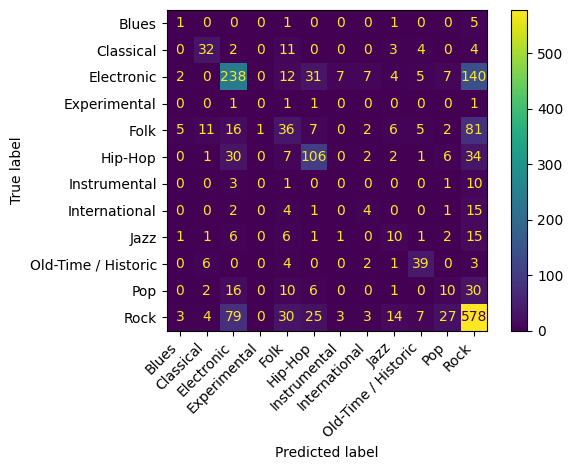

Classification accuracy: 0.56 (56.33%)
Precision: 0.55
Recall: 0.56
F-score: 0.55


In [167]:
model = OptimisedNeuralNetwork().to(device)
model.load_state_dict(torch.load("optimised_model_2000.pth"))
labels = np.unique(le.inverse_transform(data["genre"]))
correct, size, all_labels, all_predictions, precision, recall, fscore, support = test(assessing=True)
matrix = confusion_matrix(all_labels,all_predictions)
plt.figure(figsize=(10,8))
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels) 
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(f"Classification accuracy: {correct/size:.2f} ({correct/size*100:.2f}%)")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-score: {fscore:.2f}")

As a reminder, our initial model's scores are as follows:

c:\Users\seanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x800 with 0 Axes>

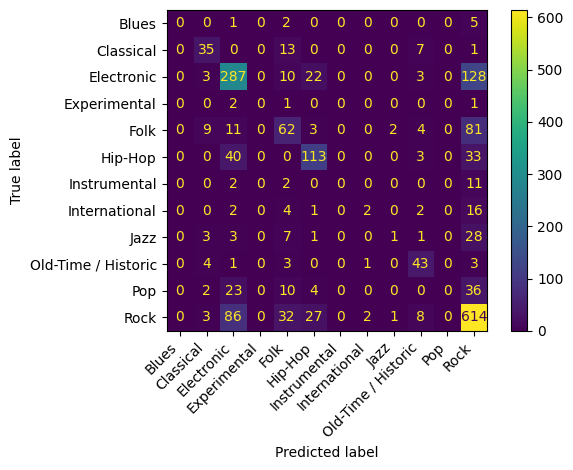

Classification accuracy: 0.62 (61.84%)
Precision: 0.57
Recall: 0.62
F-score: 0.59


In [166]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("initial_model_2000.pth"))
labels = np.unique(le.inverse_transform(data["genre"]))
correct, size, all_labels, all_predictions, precision, recall, fscore, support = test(assessing=True)
matrix = confusion_matrix(all_labels,all_predictions)
plt.figure(figsize=(10,8))
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels) 
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(f"Classification accuracy: {correct/size:.2f} ({correct/size*100:.2f}%)")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-score: {fscore:.2f}")

Based on these observations, we can say:
* Our "optimised" model appears to perform worse than our initial model 
* Configuring hyper-parameters to different settings can improve the success of a model, as shown by our table of all results. 
* However, combining the most successful changes did not lead to a successful method to an optimal model.

Overall, we have learned from this that sometimes creating models can be a very trial-and-error process. While there may exist a combination of our hyper-parameter changes that creates the optimal model, it is likely that further exploration of different approaches may have to be conducted. We have observed improvements in performance, such as in our model using 2 hidden layers of 128x64:

c:\Users\seanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x800 with 0 Axes>

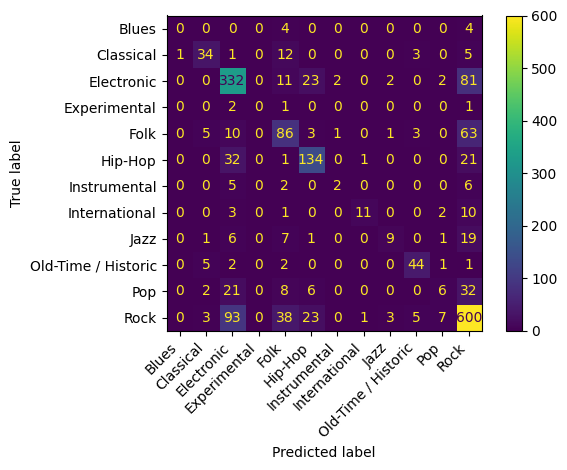

Classification accuracy: 0.67 (67.24%)
Precision: 0.66
Recall: 0.67
F-score: 0.66


In [169]:
model = NeuralNetwork(hidden_size1=128,hidden_size2=64).to(device)
model.load_state_dict(torch.load("two_hl_128x64_2000.pth"))
labels = np.unique(le.inverse_transform(data["genre"]))
correct, size, all_labels, all_predictions, precision, recall, fscore, support = test(assessing=True)
matrix = confusion_matrix(all_labels,all_predictions)
plt.figure(figsize=(10,8))
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels) 
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(f"Classification accuracy: {correct/size:.2f} ({correct/size*100:.2f}%)")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-score: {fscore:.2f}")

In [ ]:
class IdeaNeuralNetwork(nn.Module):
    # 8 features as input
    # 12 classes present in data   
    def __init__(self, input_size = 8, hidden_size1 = 128, hidden_size2 = 64, output_size = 12):
        super(OptimisedNeuralNetwork, self).__init__()
        self.data_pass = nn.Sequential(OrderedDict([
            ('Linear1', nn.Linear(input_size, hidden_size1)),
            ('Sigmoid', nn.Sigmoid()),
            ('Linear2', nn.Linear(hidden_size1, hidden_size2)),
            ('ReLU2', nn.ReLU()),
            ('Linear3',  nn.Linear(hidden_size2, output_size)),
        ]))
        
    # When model is called, such as in outputs = model(data), this function is called automatically. 
    def forward(self, x):
        logits = self.data_pass(x)
        return logits

model = IdeaNeuralNetwork().to(device)
loss_function = nn.CrossEntropyLoss() 
optimiser = optim.SGD(model.parameters(), lr=0.25, momentum = 0.25)
print(model)  

In [ ]:
train(model_name="idea_model")

In [ ]:
model_test_name = "idea_model"
model.load_state_dict(torch.load(f"{model_test_name}_500.pth"))
print("Testing at epochs 500, 1000, and 2000")
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_1000.pth"))
print(test())
model.load_state_dict(torch.load(f"{model_test_name}_2000.pth"))
print(test())

In [ ]:
model = IdeaNeuralNetwork().to(device)
model.load_state_dict(torch.load("idea_model_2000.pth"))
labels = np.unique(le.inverse_transform(data["genre"]))
correct, size, all_labels, all_predictions, precision, recall, fscore, support = test(assessing=True)
matrix = confusion_matrix(all_labels,all_predictions)
plt.figure(figsize=(10,8))
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels) 
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(f"Classification accuracy: {correct/size:.2f} ({correct/size*100:.2f}%)")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-score: {fscore:.2f}")

Compared to the initial model, this is an improvement, by all metrics we have chosen to observe. Precision in particular has improved quite a bit.

## <a id='toc5_6_'></a>[Conclusion](#toc0_)

While configuring hyper-parameters can lead to better performance, as we have seen, simply combining different configurations is not always optimal. \
Many different options and configurations may need to be explored to create what could be considered an optimal model. In addition, proper feature selection and preparation of data can alter results.

There are many things to consider when building a model such as a neural network, and while there are many libraries available that can aid the process, it is still not simple.

# <a id='toc6_'></a>[Future changes that can be made to improve performance](#toc0_)

If you've reached the end of this tutorial, thank you for reading! I hope you have found it interesting and learned something.

If you wish to see further how different configurations and approaches can improve the performance of the models created in this tutorial, here are some suggestions for what you can experiment with:
* Exploring techniques such as dropout and weight initialisation 
* More epochs 
* Exploring changing the momentum value
* More hidden layers and different hidden layer sizes
* Exploring batch size
* Changing momentum of our optimiser
* Using a combination of activation functions
* Further exploration of the data - such as choosing different features.

Please note these may require research on your part.




# <a id='toc7_'></a>[References](#toc0_)

* ANUPAM, U. (n.d.). Music Genre Classification. Retrieved from Kaggle: https://www.kaggle.com/code/dapy15/music-genre-classification
* DATAI. (n.d.). Convolutional Neural Network (CNN) Tutorial. Retrieved from Kaggle: https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial
* Defferrand, M., Benzi, K., Vandergheynst, P., & Bresson, X. (2017). FMA: A Dataset For Music Analysis. (3). doi:arXiv:1612.01840
* Defferrard, M. (2021). mdeff/fma: FMA: A Dataset For Music Analysis. Retrieved March 08, 2024, from GitHub: https://github.com/mdeff/fma
* Goulart, A. J., Guido, R. C., & Maciel, C. D. (2012). Exploring different approaches for music genre classification. Egyptian Informatics Journal, 13(2), 59-63.
* Graupe, D. (2013). Principles Of Artificial Neural Networks (1 ed.). Singapore: World Scientific Publishing Company.
* K, B. (2023, July). Introduction to Deep Neural Networks. Retrieved from Datacamp: https://www.datacamp.com/tutorial/introduction-to-deep-neural-networks
* Kingma, D. P., & Ba, J. (2017, Jan 30). Adam: A Method for Stochastic Optimization. (9). doi:https://doi.org/10.48550/arXiv.1412.6980
* mdeff. (n.d.). fma/baselines.ipynb. Retrieved from GitHub: https://github.com/mdeff/fma/blob/master/baselines.ipynb
* Mesquita, D. (n.d.). Python AI: How to Build a Neural Network & Make Predictions. Retrieved from Real Python: https://realpython.com/python-ai-neural-network/
* Negnevitsky, M. (2011). Artifical Intelligence: A Guide to Intelligent Systems (3 ed.). Harlow, United Kingdom: Pearson Education, Limited.
* PyTorch. (n.d.). Build the Neural Network. Retrieved from PyTorch: https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
* PyTorch. (n.d.). Optimizing Model Parameters. Retrieved from PyTorch: https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html
* PyTorch. (n.d.). Saving and Loading Models. Retrieved from PyTorch: https://pytorch.org/tutorials/beginner/saving_loading_models.html
* scikit-learn. (n.d.). sklearn.preprocessing.LabelEncoder. Retrieved from scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
* scikit-learn. (n.d.). sklearn.preprocessing.MinMaxScaler. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler
* Tutorials Point. (n.d.). Artificial Neural Networks Tutorial. Retrieved from Tutorials Point: https://www.tutorialspoint.com/artificial_neural_network/index.htm




